# Multi class classification of Brain Tumor

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_dir = 'dataset/brain_tumor/'

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    fill_mode='nearest',
    height_shift_range=0.1,
    shear_range=0.2,
    brightness_range=None,
    validation_split=0.2
)
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [14]:
train_data = train_generator.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

val_data = val_generator.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    subset='validation'
)

Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


In [10]:
import os
LABELS = [f.name for f in os.scandir(data_dir) if f.is_dir()]

In [11]:
LABELS

['glioma', 'healthy', 'meningioma', 'pituitary']

# Viewing Images from train set and validation set

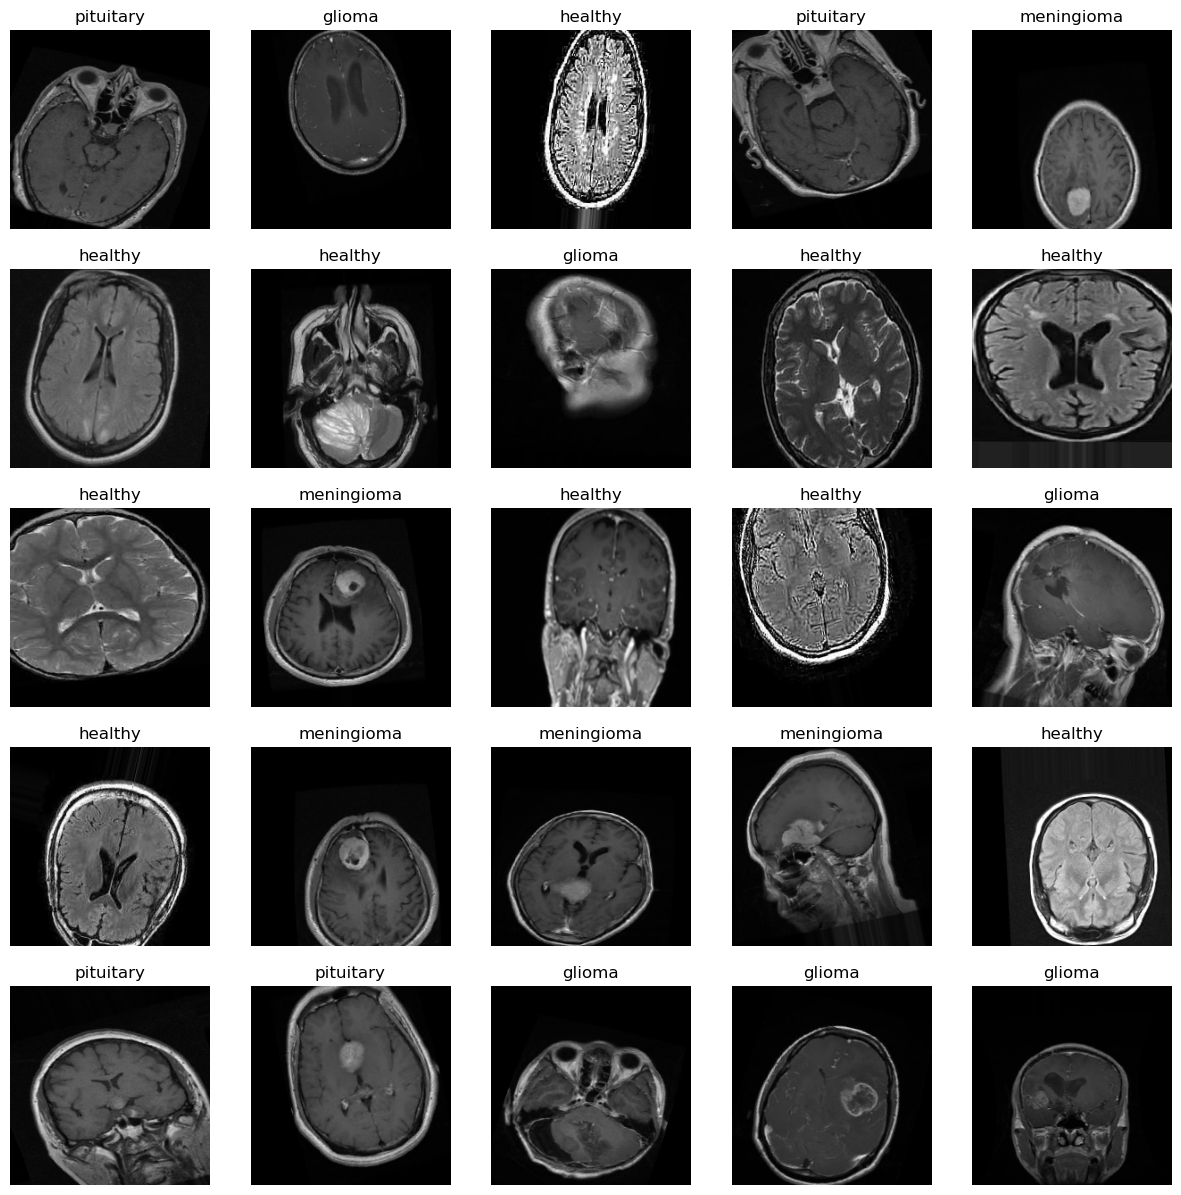

In [16]:
images,labels = next(train_data)

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(LABELS[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

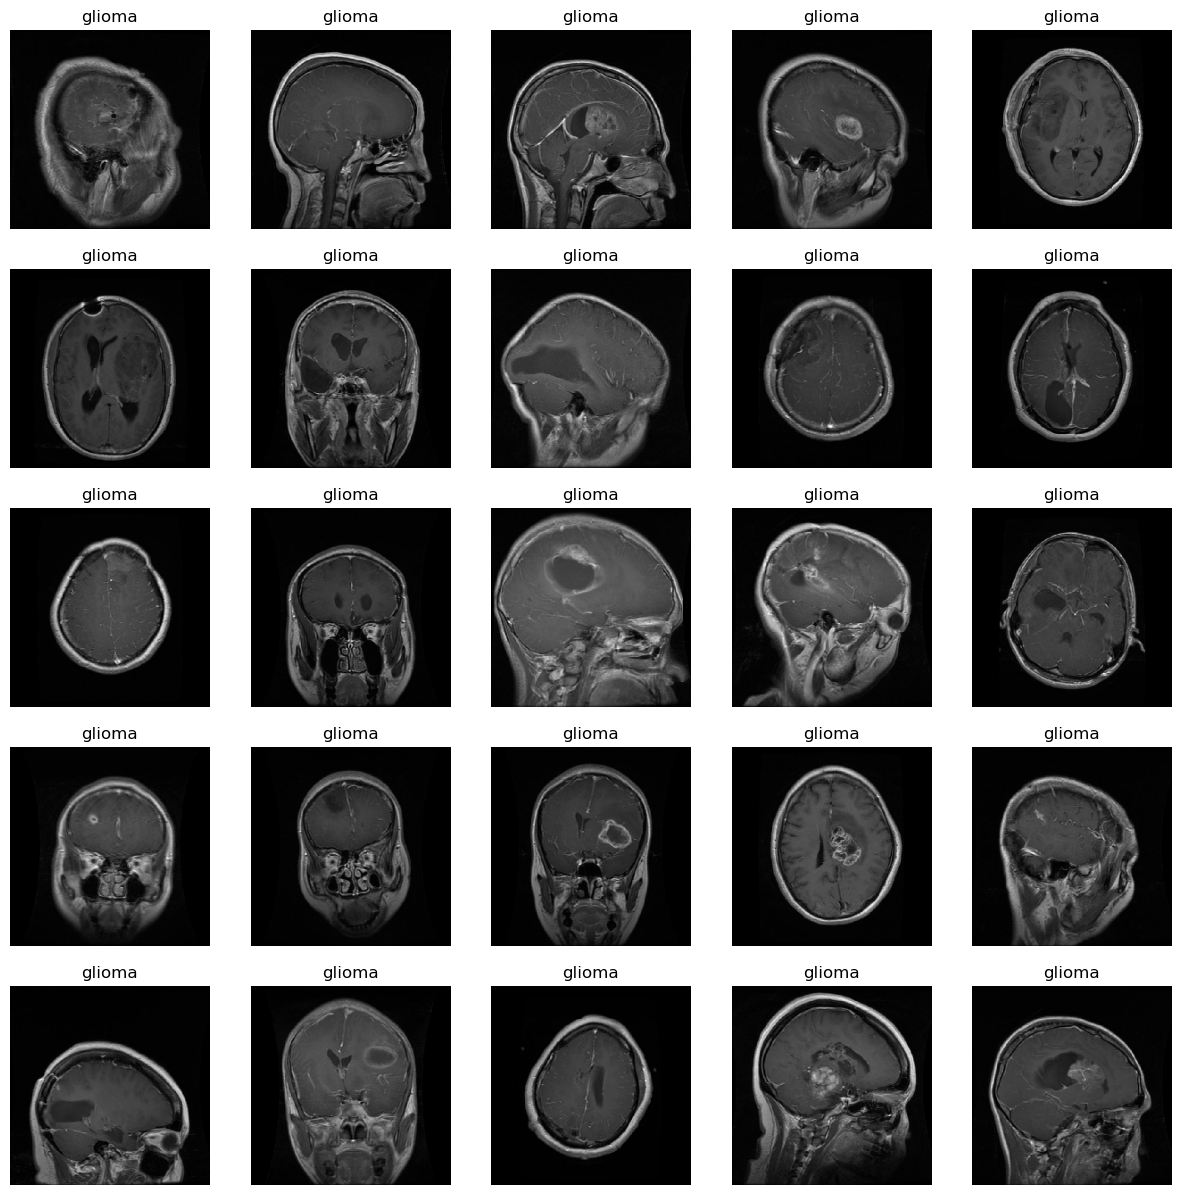

In [17]:
images,labels = next(val_data)

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(LABELS[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

# Creating a Model

In [22]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, BatchNormalization, Input, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

input_layer = Input(shape=(224,224,3))
x = Conv2D(32, 3, activation = 'relu',padding = 'same')(input_layer)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(64, 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(2,2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation = 'softmax')(x)
model = Model(input_layer, output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 64)      36928     
                                                           

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [24]:
Epochs=10
history = model.fit(train_data, epochs=Epochs, validation_data=val_data,verbose=2)

Epoch 1/10
176/176 - 45s - loss: 1.2611 - accuracy: 0.3579 - val_loss: 1.1971 - val_accuracy: 0.4452 - 45s/epoch - 255ms/step
Epoch 2/10
176/176 - 42s - loss: 1.0132 - accuracy: 0.5346 - val_loss: 0.9645 - val_accuracy: 0.5719 - 42s/epoch - 240ms/step
Epoch 3/10
176/176 - 42s - loss: 0.8768 - accuracy: 0.6384 - val_loss: 0.8154 - val_accuracy: 0.6460 - 42s/epoch - 240ms/step
Epoch 4/10
176/176 - 42s - loss: 0.7828 - accuracy: 0.6773 - val_loss: 0.6803 - val_accuracy: 0.7222 - 42s/epoch - 239ms/step
Epoch 5/10
176/176 - 42s - loss: 0.7266 - accuracy: 0.7081 - val_loss: 0.5194 - val_accuracy: 0.8148 - 42s/epoch - 240ms/step
Epoch 6/10
176/176 - 42s - loss: 0.6766 - accuracy: 0.7185 - val_loss: 0.5840 - val_accuracy: 0.7521 - 42s/epoch - 239ms/step
Epoch 7/10
176/176 - 42s - loss: 0.6112 - accuracy: 0.7533 - val_loss: 0.4888 - val_accuracy: 0.8155 - 42s/epoch - 240ms/step
Epoch 8/10
176/176 - 42s - loss: 0.5452 - accuracy: 0.7758 - val_loss: 0.4664 - val_accuracy: 0.7963 - 42s/epoch - 240

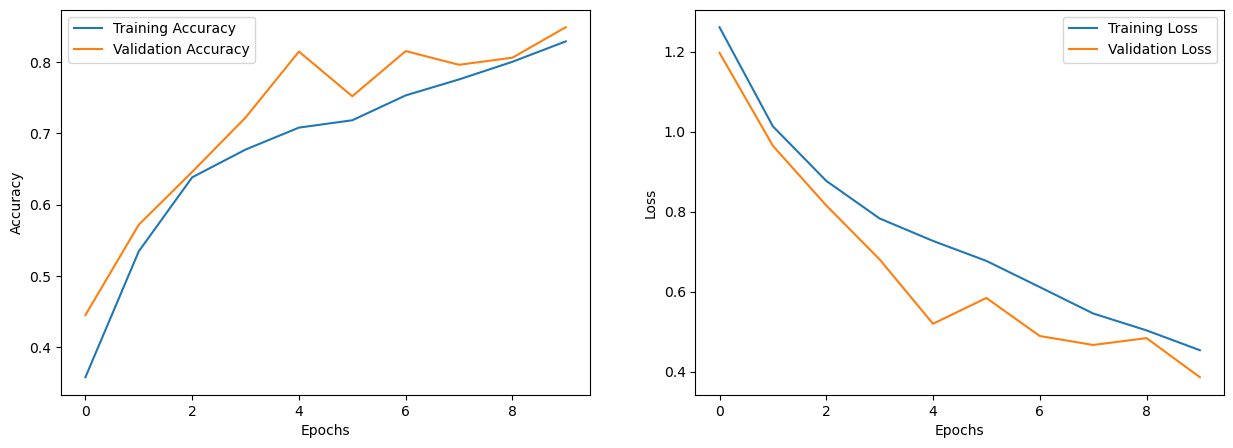

In [32]:
def plot_model_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_model_history(history)

# Using VGG16 with pretrained weights

In [28]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet', input_tensor=input_layer)
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)
vgg_model = Model(input_layer, outputs)
vgg_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [30]:
vgg_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [31]:
Epochs=10
history2 = vgg_model.fit(train_data, epochs=Epochs, validation_data=val_data,verbose=2)

Epoch 1/10
176/176 - 57s - loss: 0.7997 - accuracy: 0.6978 - val_loss: 0.5297 - val_accuracy: 0.8127 - 57s/epoch - 324ms/step
Epoch 2/10
176/176 - 46s - loss: 0.5420 - accuracy: 0.7952 - val_loss: 0.4115 - val_accuracy: 0.8675 - 46s/epoch - 260ms/step
Epoch 3/10
176/176 - 46s - loss: 0.4859 - accuracy: 0.8192 - val_loss: 0.3922 - val_accuracy: 0.8689 - 46s/epoch - 261ms/step
Epoch 4/10
176/176 - 46s - loss: 0.4309 - accuracy: 0.8372 - val_loss: 0.4046 - val_accuracy: 0.8519 - 46s/epoch - 261ms/step
Epoch 5/10
176/176 - 46s - loss: 0.4154 - accuracy: 0.8423 - val_loss: 0.3783 - val_accuracy: 0.8661 - 46s/epoch - 262ms/step
Epoch 6/10
176/176 - 46s - loss: 0.4038 - accuracy: 0.8503 - val_loss: 0.4052 - val_accuracy: 0.8519 - 46s/epoch - 261ms/step
Epoch 7/10
176/176 - 46s - loss: 0.3829 - accuracy: 0.8585 - val_loss: 0.3191 - val_accuracy: 0.8889 - 46s/epoch - 263ms/step
Epoch 8/10
176/176 - 46s - loss: 0.3740 - accuracy: 0.8569 - val_loss: 0.3214 - val_accuracy: 0.8796 - 46s/epoch - 261

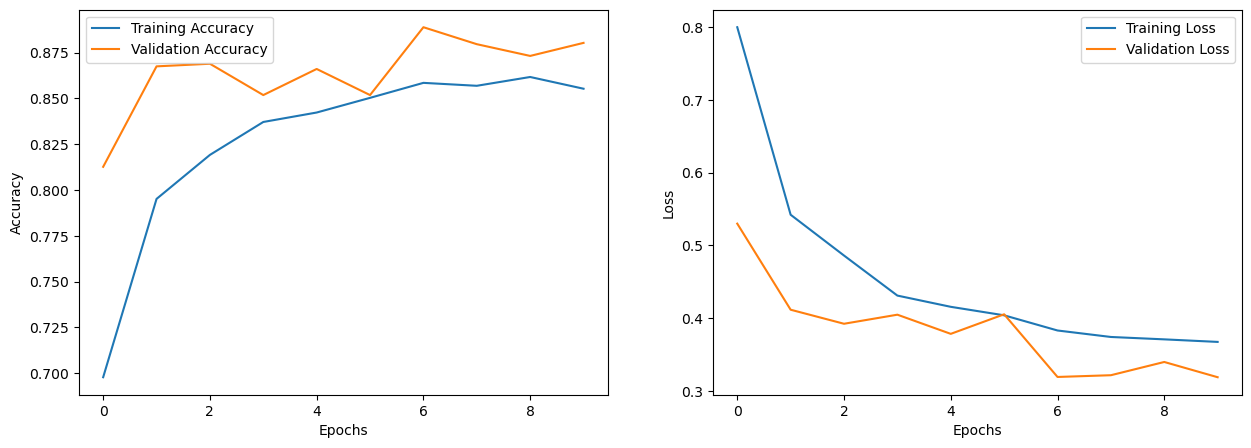

In [33]:
plot_model_history(history2)